<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Which-correlation-method-to-use?" data-toc-modified-id="Which-correlation-method-to-use?-1">Which correlation method to use?</a></span></li><li><span><a href="#Function-description" data-toc-modified-id="Function-description-2">Function description</a></span><ul class="toc-item"><li><span><a href="#1.-check_data" data-toc-modified-id="1.-check_data-2.1">1. <code>check_data</code></a></span></li><li><span><a href="#2.-do_correlation" data-toc-modified-id="2.-do_correlation-2.2">2. <code>do_correlation</code></a></span></li><li><span><a href="#3.-plot_correlation" data-toc-modified-id="3.-plot_correlation-2.3">3. <code>plot_correlation</code></a></span></li></ul></li><li><span><a href="#Examples" data-toc-modified-id="Examples-3">Examples</a></span><ul class="toc-item"><li><span><a href="#Load-the-'flexible-correlations'-script" data-toc-modified-id="Load-the-'flexible-correlations'-script-3.1">Load the 'flexible correlations' script</a></span></li><li><span><a href="#A-standart-correlation-plot" data-toc-modified-id="A-standart-correlation-plot-3.2">A standart correlation plot</a></span></li><li><span><a href="#A-plot-with-outliers-displayed" data-toc-modified-id="A-plot-with-outliers-displayed-3.3">A plot with outliers displayed</a></span></li><li><span><a href="#Inspecting-outliers-and-normality" data-toc-modified-id="Inspecting-outliers-and-normality-3.4">Inspecting outliers and normality</a></span></li><li><span><a href="#Multiple-correlation-plots" data-toc-modified-id="Multiple-correlation-plots-3.5">Multiple correlation plots</a></span></li></ul></li></ul></div>

# Which correlation method to use?

**Pearson's correlation** is the most popular for continuous data. However, if data has outliers or does not meet the normality assumption, Pearson's correlation is inappropriate. Instead, one should use robust correlation methods, for example, **Spearman skipped** or **percentage-bend** correlation. On the other hand, if data is normally distributed and has no outliers, Pearson's correlation gives more power. Here I provide an R-script that first inspects the data for outliers (boxplot/bagplot method) and normality (Henze-Zirkler test) and then chooses the most appropriate of the three correlation methods. Based on [Pernet et al. (2013)](https://doi.org/10.3389/fpsyg.2012.00606 "Pernet, C. R., Wilcox, R. R., & Rousselet, G. A. (2013). Robust correlation analyses: false positive and power validation using a new open source matlab toolbox. Frontiers in psychology, 606."), I follow three simple rules for selecting the correlation method:
* **Pearson's correlation**: Data is normally distributed and has no outliers
* **Spearman skipped correlation**: Data has bi-variate outliers
    * Using the minimum covariance determinant (MCD) estimator
* **(20%) Percentage-bend correlation**: Data has no bi-variate outliers but is not normally distributed or has univariate outliers

The **'Flexible Correlation'** script is available from my [GitHub repository](https://github.com/dcdace/R_functions/tree/main/flexible-correlations).

# Function description
`flexible_correlations.r` script contains three functions.

## 1. `check_data`

**`check_data`** function checks data outliers and normality. It uses the `boxplot` method to check for univariate outliers, `bagplot` method for bi-variate outliers, and `Henze-Zirkler test` for bi-variate normality.

***Input***

`check_data(var1, var2,  
    var1name = "var1",  
    var2name = "var2",  
    var1ylab = "",  
    var2ylab = "",  
    disp = FALSE)`

* Required
    * `var1` and `var2` are numerical vectors; the two continuous variables you want to correlate.  
* Optional
    * `var1name` and `var2name` are strings; names of the variables to be displayed on boxplots. The default is "var1" and "var2".
    * `var1ylab` and `var2ylab` are strings; y-axis labels for the two variables to be displayed on boxplots. The defaults are empty strings. 
    * `disp` is logical. Whether you want to display the assumption check results (boxplots, bagplot,q-q plot). The default is `FALSE`.
    
***Output***

A 4-item list:
1. `outliers_all`: All outlier cases; a numeric vector
2. `outliers_uni`: Univariate outlier cases; a numeric vector
3. `outliers_bi`: Bi-variate outlier cases; a numeric vector
4. `normality`: Whether data is bi-variat normal; TRUE/FALSE

If attribute `disp = TRUE` then summary text will be outputed and 4 plots displayed: 2 boxplots, a bagplot, and q-qplot.  

The output is used by the other two functions, `do_correlation` and `plot_correlation`.

## 2. `do_correlation`

**`do_correlation`** function performs one of the three correlation methods. It uses the number of univariate and bi-variate outliers obtained from the `check_data` function. It performs the `Henze-Zirkler test` to determine whether the data meet bi-variate normal distribution.

***Input***  

`do_correlation(var1, var2,  
    data_check = NULL)`

* Required
    * `var1` and `var2` are numerical vectors; the two continuous variables you want to correlate.  
* Optional
    * `data_check` is the list of data check results. If not provided, then `check_data` function will be executed to get the outlier list.
    
***Output***

A 3-item list:
1. `txt`: Correlation results in the form to be displayed on the correlation plot.
2. `p`: A p-value of the correlation.
3. `datainfo`: Information whether data has otliers and is normally distributed. 

The output is used by the `plot_correlation` function.


## 3. `plot_correlation`

**`plot_correlation`** function displays a scatterplot, trend line with shaded 95%CI, and correlation results in a text form at the top. 

***Input***

`plot_correlation(var1, var2, 
    var1name = "var1", 
    var2name = "var2",
    corr_results = NULL,
    data_check = NULL,
    pointsize = 1.8, 
    txtsize = 11,     
    plotoutliers = FALSE,
    pthreshold = NULL,
    datainfo = TRUE)`  

* Required
    * `var1` and `var2` are numerical vectors; the two continuous variables you want to correlate.  
* Optional
    * `var1name` and `var2name` are strings; names of the variables to be displayed on boxplots. The default is "var1" and "var2".    
    * `corr_results` is the correlation results from the function `do_correlation`. If not provided, the `do_correlation` function will be executed to get the results. 
    * `data_check` is the list of data check results. If not provided, then `check_data` function will be executed to get the outlier list. 
    * `pointsize`is numeric; the size of the scatterplot points. The default is 1.8.
    * `txtsize` is numeric; the font size of the scatterplot labels. The default is 11. The title size would be 2 points larger.
    * `plotoutliers` is logical. Whether to plot outlier cases on the scatterplot. The default is `FALSE`. 
    * `pthreshold` is numeric; a p-value threshold for statistically significant correlation. If provided, a red box will be displayed around the scaterplot and the result text will be displayed in bold.
    * `datainfo` is logical. Whether to display data summary information about outliers and normality. The information would be displayed in the plot camption. The default is `TRUE`.
    
***Output***

A correlation scatterplot with result text at the top. 

# Examples
## Load the 'flexible correlations' script

In [7]:
source("https://raw.githubusercontent.com/dcdace/R_functions/main/flexible-correlations/flexible_correlations.r")

## A standart correlation plot
Let's use the R built-in dataset `mtcars` and look at the correlation between automobile weight and fuel consumption.

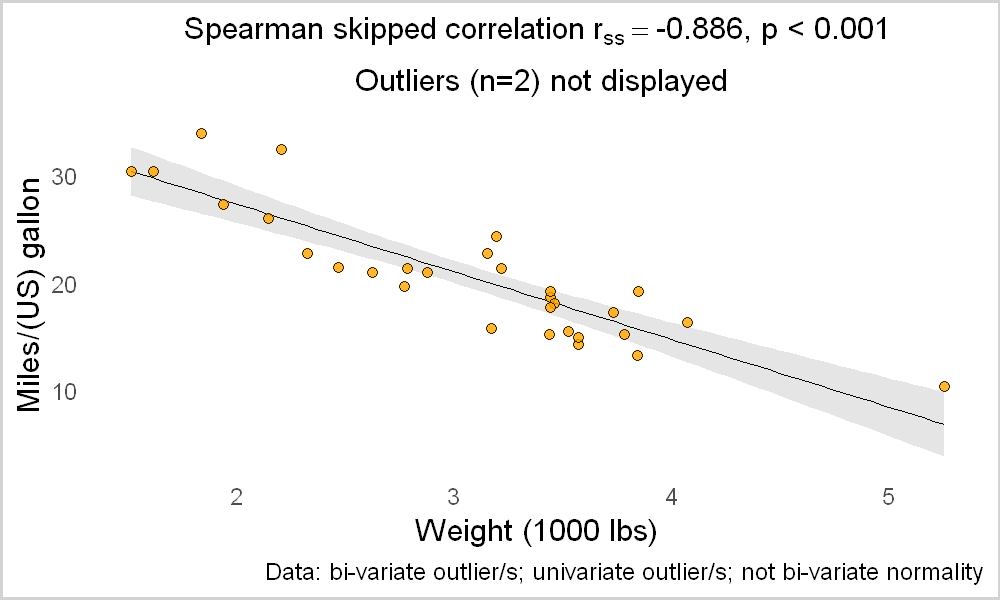

In [2]:
# plot size for jupyter notebook
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 200)

# get the dataset
df <- mtcars
# plot the result
plot_correlation(df$wt, df$mpg,
                 var1name = "Weight (1000 lbs)",
                 var2name = "Miles/(US) gallon")

We see that Spareman skipped correlation was performed, and it was significant. We also see that there were two outliers in the data, and data did not meet bi-variate normality.

## A plot with outliers displayed

You can also display the outlier cases on the scatterplot if you like. And you can also remove the data assumption summary from the bottom. 

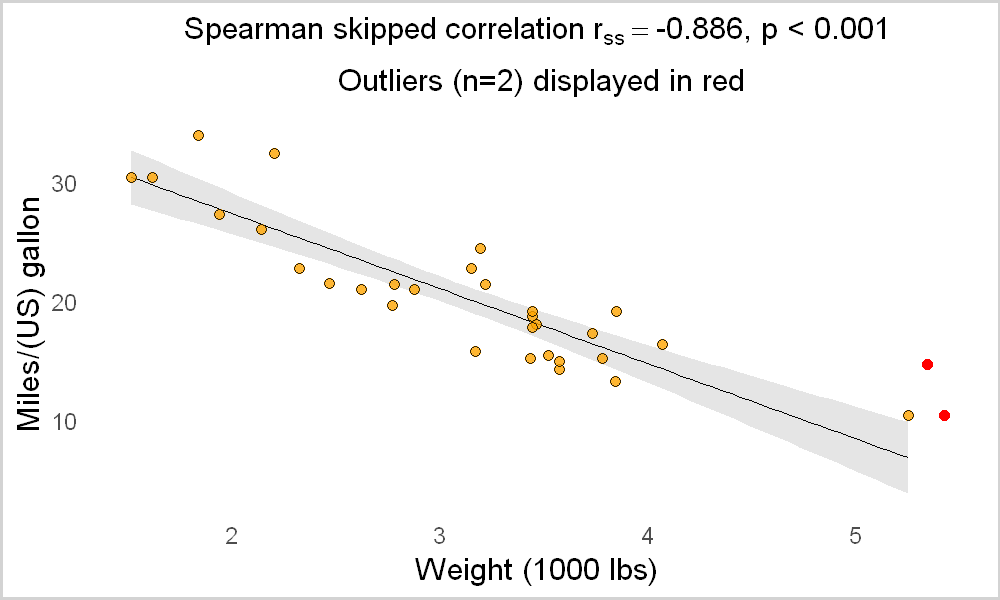

In [3]:
# plot the result, including outlier cases
plot_correlation(df$wt, df$mpg,
                 var1name = "Weight (1000 lbs)",
                 var2name = "Miles/(US) gallon",
                 plotoutliers = TRUE,
                 datainfo = FALSE)

## Inspecting outliers and normality
You might want to inspect the data outliers and normality distribution more closely. For that, you can run the `check_data` function with `disp = TRUE` setting.


Weight (1000 lbs) outlier cases(n=2): 16,17 
Miles/(US) gallon outlier cases(n=0):  
Bi-variate outlier cases(n=1): 17 

Henze-Zirkler test for Multivariate Normality:
Data are not bi-variate normal(HZ = 0.97, p = 0.02)


$outliers_all
[1] 16 17 17

$outliers_uni
[1] 16 17

$outliers_bi
[1] 17

$normality
[1] FALSE

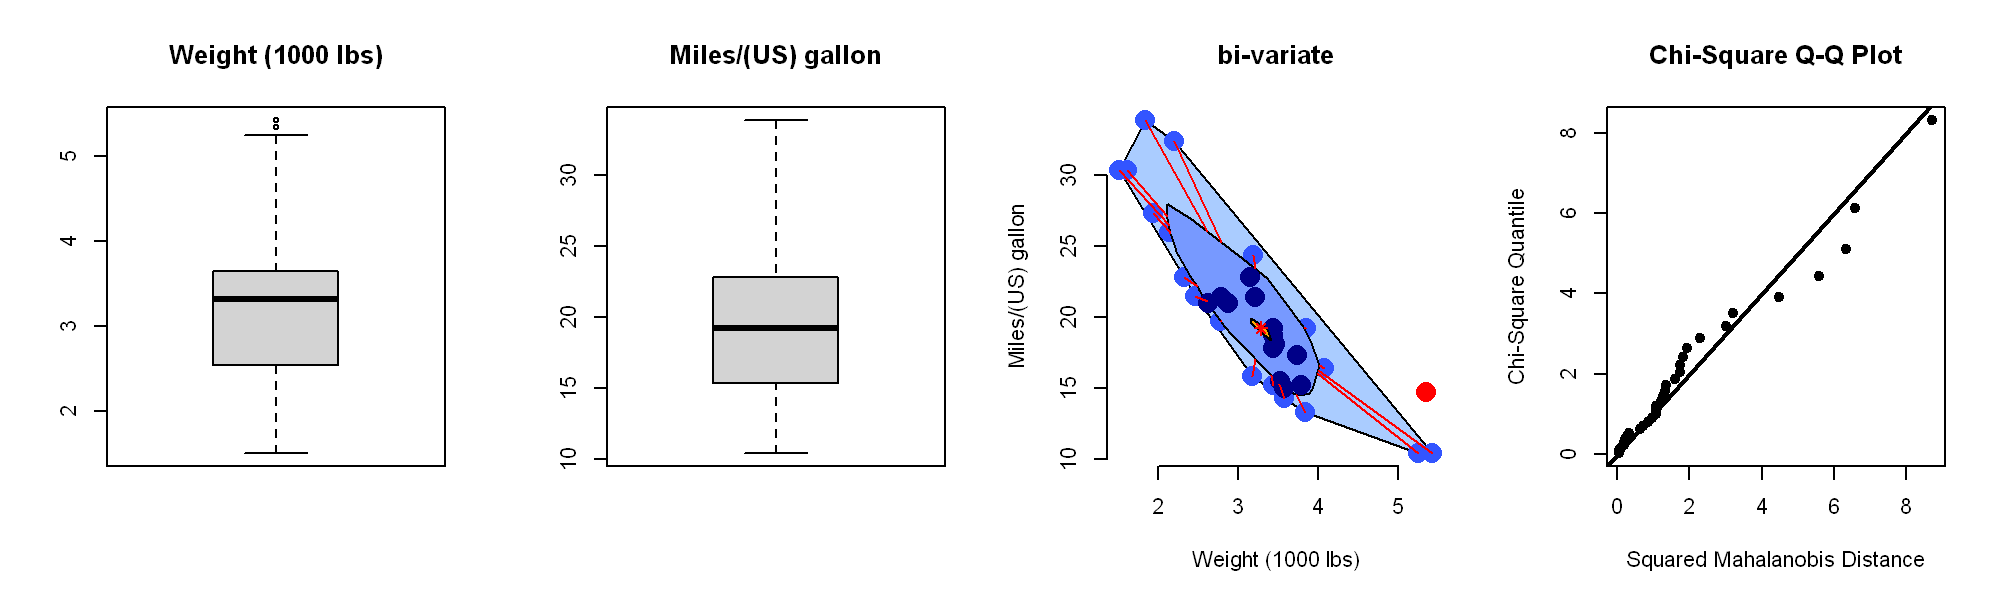

In [4]:
# plot size for jupyter notebook
options(repr.plot.width = 10, repr.plot.height = 3, repr.plot.res = 200)

# run assumption check function
check_data(df$wt, df$mpg,
             var1name = "Weight (1000 lbs)",
             var2name = "Miles/(US) gallon",
             disp = TRUE)

We see that there were two outliers in the 'weight' variable, no outliers in the 'fuel consumption' variable, and one bi-variate outlier. The robust Spearman skipped correlation is most appropriate because of the bi-variate outlier in the data.

## Multiple correlation plots

I have found this 'flexible correlation' script particularly handy for explorations, looking at several correlations together.

In [5]:
# To bind plots together, I will use gridExtra package
# Install and load gridExtra
if (length(find.package("gridExtra", quiet = TRUE)) == 0) {
  install.packages("gridExtra", dependencies = TRUE)
  library(gridExtra)
}

As an example, let's look at another R built-in dataset `iris` and correlate the petal length and petal width for each species of Iris flower.

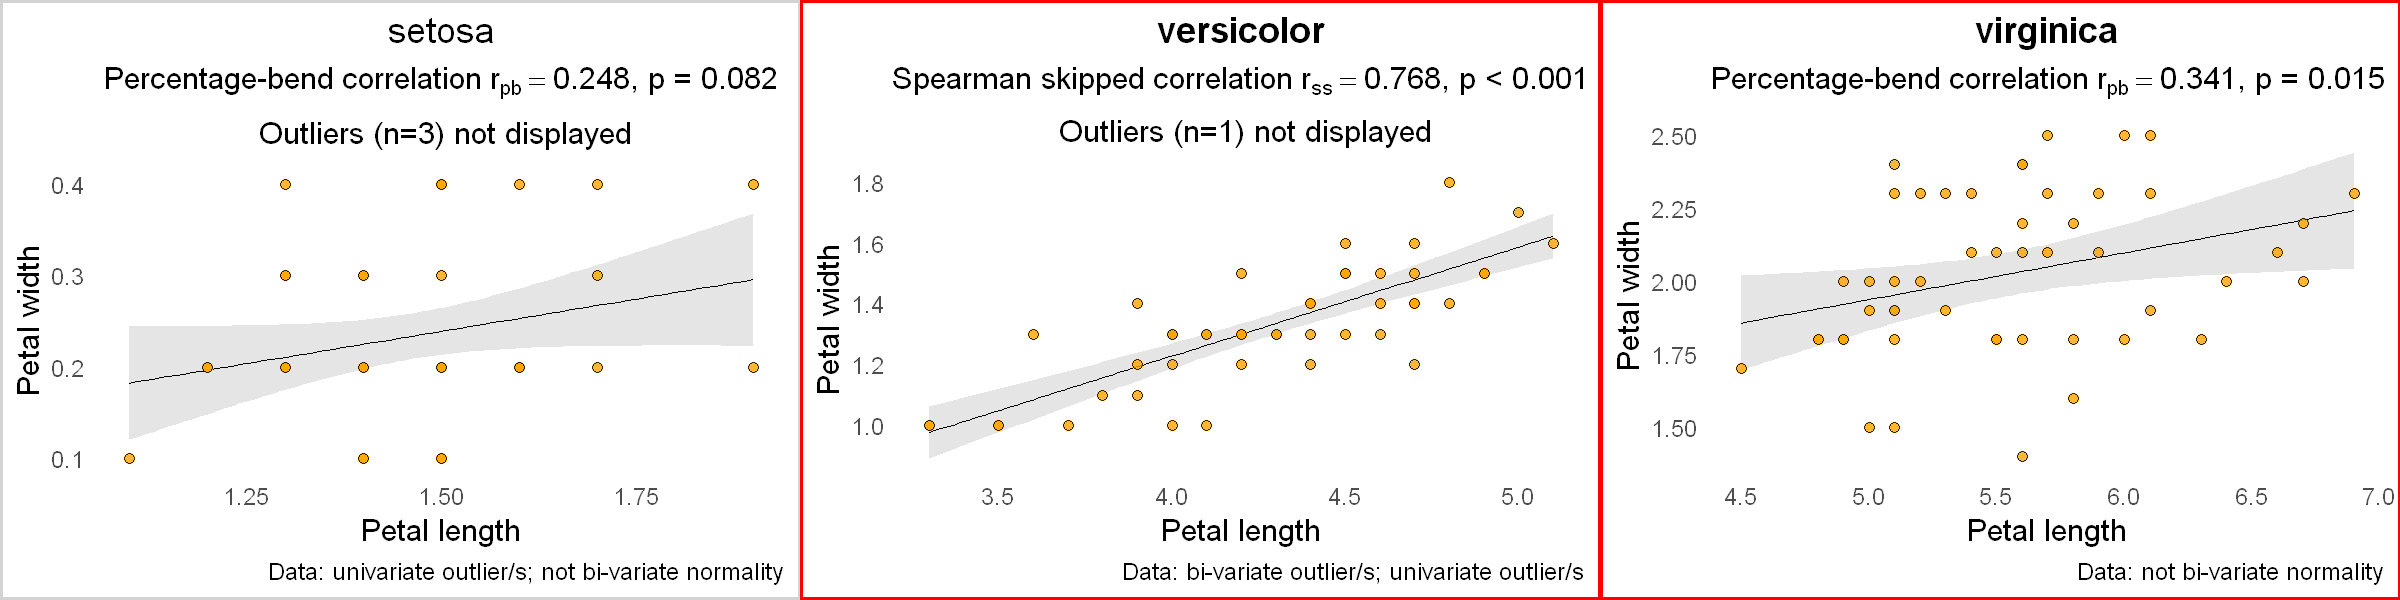

In [6]:
# plot size for jupyter notebook
options(repr.plot.width = 12, repr.plot.height = 3)

# get the dataset
df <- iris
# get the species types and how many they are
iris.species <- levels(df$Species)
nspecies <- length(iris.species)
# create an empty list where plots will be stored
plotlist <- list()
# for each species type, plot the correlation
for (i in 1:nspecies) {
  ds <- subset(df, df$Species == iris.species[i]) # a subset data for this species
  p <- plot_correlation(ds$Petal.Length, ds$Petal.Width,
                        var1name = "Petal length", var2name = "Petal width",
                        pthreshold = 0.05 / nspecies, # p-value threshold, accounting for multiple comparisons
                       datainfo = TRUE) +
    labs(title = iris.species[i]) # add species name as a title for each plot 

  plotlist[[i]] <- p # add this plot to the plotlist
}
# display the plots
gridExtra::grid.arrange(grobs = plotlist, nrow = 1)